In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk 
import seaborn as sns
import string
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THOMAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
mail = pd.read_csv('train_data.csv')
mail

,email,label
0,MiniNTK 2002-08-16 __ __ _2002-08-16 _ ____...,ham
1,Tags reveal if frozen food is rottenURL: http:...,ham
2,Personal 75% OFF to hibody@csmining.org. Pfi...,spam
3,From fork-admin@xent.com Mon Sep 23 22:47:38 ...,ham
4,Re: Anolther sequence related tracebackI have ...,ham
...,...,...
7495,From fork-admin@xent.com Sat Sep 7 21:52:53 ...,ham
7496,Only me left You're subscribed to t...,spam
7497,Re: use new apt to do null to RH8 upgrade?> Ma...,ham
7498,Subject: interview with hao peng hello kathy ...,ham


In [4]:
mail.shape

(7500, 2)

In [5]:
print(mail.email.duplicated().sum())
mail.loc[mail.duplicated(), :]

136


,email,label
236,Re: [zzzzteana] Secondhand books online > Mar...,ham
300,"Get your own genome, feed your hypochondriaURL...",ham
446,Mac OS X browsersURL: http://www.askbjoernhans...,ham
835,Bindings problem with current CVS codeI've had...,ham
1032,[Razor-users] razor vs cloudmark - merging?I a...,ham
...,...,...
7405,"Re: [zzzzteana] Which Muppet Are You?Hey, it's...",ham
7429,"Kid crams acorn up his nose, hilarity ensuesUR...",ham
7464,ADV: Lowest life insurance rates available! ...,spam
7479,A marketplace where lenders compete for your b...,spam


In [6]:
mail.drop_duplicates(inplace = True)
mail.shape

(7364, 2)

In [7]:
def cleaned_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)       
    text = re.sub('\t', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\'', '  ', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('β', '', text)
    text = re.sub(',,', ',', text)
    text = re.sub('aa', 'a', text)
    text = re.sub('aaa', 'a', text)
    text = re.sub('Ξ’Β', '', text)
    text = re.sub('Ξ', '', text)
    text = re.sub('Β', '', text)
    text = re.sub('ξ', '', text)
    text = re.sub('β', '', text)
    return text

In [8]:
clean = lambda x: cleaned_text(x)

In [9]:
mail['email'] = pd.DataFrame(mail.email.apply(clean))

In [10]:
t = time.process_time()
mail['email'] = pd.DataFrame(mail.email.apply(clean))
elapsed_time = time.process_time() - t
print(elapsed_time)

4.875


In [11]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
t = time.process_time()

mail['email'] = mail['email'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
elapsed_time = time.process_time() - t
print(elapsed_time)

7.796875


In [13]:
print(mail.email.duplicated().sum())
mail.loc[mail.duplicated(), :]

84


,email,label
157,daily dilbert nobody sun sep contenttype textp...,ham
1208,nobody sun sep contenttype textplain contenttr...,spam
1519,nobody sun sep contenttype textplain contenttr...,spam
1533,nobody sun sep contenttype textplain contenttr...,spam
1570,felicityklugenet mon sep returnpath felicitykl...,ham
...,...,...
7348,one kind money maker try freefrom nobody sun s...,spam
7366,razor sendmailfrom nobody sun sep contenttype ...,ham
7393,subject publication submission question martin...,ham
7432,subject new resume dear vince grateful efforts...,ham


In [14]:
mail.drop_duplicates(inplace = True)

In [15]:
mail.shape

(7281, 2)

In [16]:
mail.isnull().sum()

email    0
label    0
dtype: int64

In [17]:
t=mail.label=='spam'
mail['spam'] = 0
mail.loc[t, 'spam'] = 1

In [18]:
mail

,email,label,spam
0,minintk join mail empty message ntknowsubscrib...,ham,0
1,tags reveal frozen food rottenurl date supplie...,ham,0
2,personal hibodycsminingorg pfizer webletter tr...,spam,1
3,forkadminxentcom mon sep returnpath forkadminx...,ham,0
4,anolther sequence related tracebacki patches s...,ham,0
...,...,...,...
7494,subject test shirley please remind making arra...,ham,0
7495,forkadminxentcom sat sep returnpath forkadminx...,ham,0
7496,left youre subscribed mailing list update pref...,spam,1
7498,subject interview hao peng hello kathy researc...,ham,0


In [19]:
from wordcloud import WordCloud

In [20]:
' '.join(mail['email'].tolist())

# output: 'James Went To The Market'

# or to put them in a dataframe with 1 row 1 column
ondedf=pd.DataFrame(' '.join(mail['email'].tolist()), columns=['email'], index=[0])

In [21]:
ondedf

,email
0,minintk join mail empty message ntknowsubscrib...


In [22]:
valuetxt=ondedf._get_value(0, 'email')

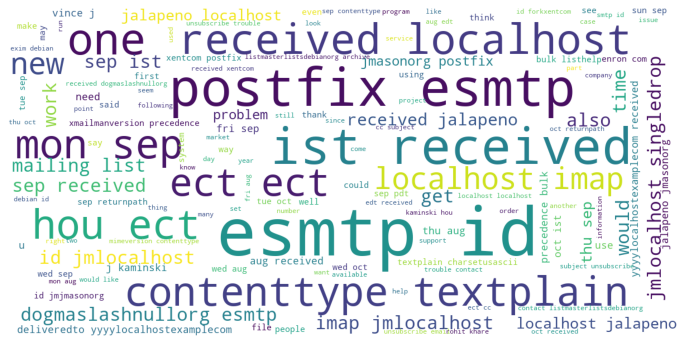

In [23]:
cloud = WordCloud(
            background_color='white',
            stopwords=stop,
            max_words=200,
            max_font_size=40, 
            scale=3
    ).generate(valuetxt)
    
plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [24]:
mail.to_csv("train.csv",index=False)

<AxesSubplot:>

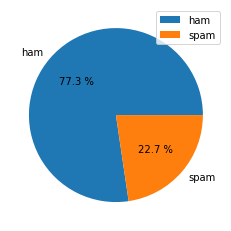

In [25]:
mail['label'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

In [26]:
def process_text(text):
    
    clean=[word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return clean

In [27]:
t = time.process_time()
vectorizer = CountVectorizer(analyzer=process_text).fit_transform(mail['email'])
elapsed_time = time.process_time() - t
print(elapsed_time)


1029.25


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(vectorizer, mail['spam'], test_size=0.30, random_state=42)

In [30]:
y_test

3752    0
5566    0
4559    1
4422    0
3957    0
       ..
4321    0
1768    0
6736    1
6582    1
2666    0
Name: spam, Length: 2185, dtype: int64

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
l1stclass= ['LogisticRegression', 'KNeighbors', 'SVC','MultinomialNB', 
            'DecisionTree', 'RandomForest']
l1stclass

['LogisticRegression',
 'KNeighbors',
 'SVC',
 'MultinomialNB',
 'DecisionTree',
 'RandomForest']

In [33]:
def models(X_train,Y_train,X_test, Y_test):
    scores=[]
    
    t = time.process_time()
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 42)
    log.fit(X_train, Y_train)
    y_predictlog=log.predict(X_test)
    elapsed_time = time.process_time() - t
    

    print("LogisticRegression")
    print("Total Predictions :", len(y_predictlog))
    print("Correct Predictions :", sum(y_predictlog==Y_test))
    print("Incorrect Predictions :", sum(y_predictlog!=Y_test))
    print("Accuracy :", sum(y_predictlog==Y_test)*100/ len(y_predictlog), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predictlog==Y_test)*100/ len(y_predictlog)
    scores.append(x)                                  
    
    t = time.process_time()
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    y_predictkn=knn.predict(X_test)
    y_predictlog=log.predict(X_test)
    elapsed_time = time.process_time() - t
    
    print("KNeighbors")
    print("Total Predictions :", len(y_predictkn))
    print("Correct Predictions :", sum(y_predictkn==Y_test))
    print("Incorrect Predictions :", sum(y_predictkn!=Y_test))
    print("Accuracy :", sum(y_predictkn==Y_test)*100/ len(y_predictkn), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predictkn==Y_test)*100/ len(y_predictkn)
    scores.append(x) 
    
    t = time.process_time()
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 42)
    svc_lin.fit(X_train, Y_train)
    y_predictsvc=svc_lin.predict(X_test)
    elapsed_time = time.process_time() - t
    
    print("SVC")
    print("Total Predictions :", len(y_predictsvc))
    print("Correct Predictions :", sum(y_predictsvc==Y_test))
    print("Incorrect Predictions :", sum(y_predictsvc!=Y_test))
    print("Accuracy :", sum(y_predictsvc==Y_test)*100/ len(y_predictsvc), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predictsvc==Y_test)*100/ len(y_predictsvc)
    scores.append(x)
    
    t = time.process_time()
    from sklearn.naive_bayes import MultinomialNB  
    classifier = MultinomialNB().fit(X_train, y_train)  
    y_predictmulti_nb=classifier.predict(X_test)
    elapsed_time = time.process_time() - t
    
    print("MultinomialNB")
    print("Total Predictions :", len(y_predictmulti_nb))
    print("Correct Predictions :", sum(y_predictmulti_nb==y_test))
    print("Incorrect Predictions :", sum(y_predictmulti_nb!=y_test))
    print("Accuracy :", sum(y_predictmulti_nb==y_test)*100/ len(y_predictmulti_nb), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predictmulti_nb==y_test)*100/ len(y_predictmulti_nb) 
    scores.append(x)
    
    t = time.process_time()
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state = 42)
    tree.fit(X_train, Y_train)
    y_predicttree=tree.predict(X_test)
    elapsed_time = time.process_time() - t
    
    print("DecisionTree")
    print("Total Predictions :", len(y_predicttree))
    print("Correct Predictions :", sum(y_predicttree==Y_test))
    print("Incorrect Predictions :", sum(y_predicttree!=Y_test))
    print("Accuracy :", sum(y_predicttree==Y_test)*100/ len(y_predicttree), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predicttree==Y_test)*100/ len(y_predicttree)
    scores.append(x)
    
    t = time.process_time()
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    forest.fit(X_train, Y_train)
    y_predictforest=forest.predict(X_test)
    elapsed_time = time.process_time() - t
    
    print("RandomForest")
    print("Total Predictions :", len(y_predictforest))
    print("Correct Predictions :", sum(y_predictforest==Y_test))
    print("Incorrect Predictions :", sum(y_predictforest!=Y_test))
    print("Accuracy :", sum(y_predictforest==Y_test)*100/ len(y_predictforest), "%")
    print("Elapsed_time :", elapsed_time)
    print()
    x=sum(y_predictforest==Y_test)*100/ len(y_predictforest)
    scores.append(x)
    return scores

In [34]:
scores = models(X_train,y_train,X_test, y_test)

LogisticRegression
Total Predictions : 2185
Correct Predictions : 2140
Incorrect Predictions : 45
Accuracy : 97.94050343249428 %
Elapsed_time : 3.453125

KNeighbors
Total Predictions : 2185
Correct Predictions : 1809
Incorrect Predictions : 376
Accuracy : 82.79176201372998 %
Elapsed_time : 2.015625

SVC
Total Predictions : 2185
Correct Predictions : 2120
Incorrect Predictions : 65
Accuracy : 97.02517162471396 %
Elapsed_time : 10.921875

MultinomialNB
Total Predictions : 2185
Correct Predictions : 2112
Incorrect Predictions : 73
Accuracy : 96.65903890160183 %
Elapsed_time : 0.015625

DecisionTree
Total Predictions : 2185
Correct Predictions : 2058
Incorrect Predictions : 127
Accuracy : 94.18764302059496 %
Elapsed_time : 3.0

RandomForest
Total Predictions : 2185
Correct Predictions : 2078
Incorrect Predictions : 107
Accuracy : 95.10297482837528 %
Elapsed_time : 2.171875



In [35]:
dfscores = pd.DataFrame(list(zip(l1stclass, scores)),
               columns =['Classifier', 'Scores'])
dfscores

,Classifier,Scores
0,LogisticRegression,97.940503
1,KNeighbors,82.791762
2,SVC,97.025172
3,MultinomialNB,96.659039
4,DecisionTree,94.187643
5,RandomForest,95.102975


In [36]:
dfscores['Scores'] = dfscores['Scores'].apply(lambda x: float("{:.2f}".format(x)))

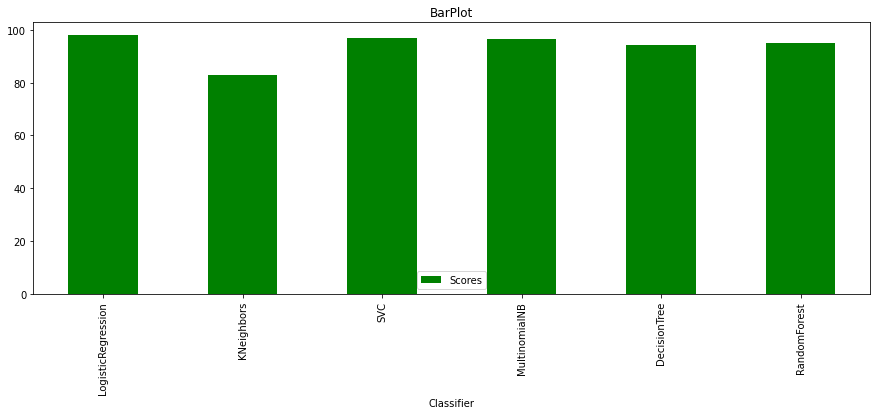

In [37]:
# bar plot
dfscores.plot(kind = 'bar',
        x = 'Classifier',
        y = 'Scores',figsize=(15,5),
        color = 'green')
  
# set the title
plt.title('BarPlot')

# show the plot
plt.show()

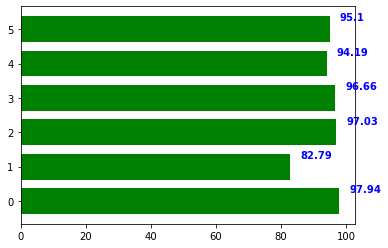

In [38]:
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(dfscores))
 
ax.barh(ind, dfscores['Scores'], width, color = "green")
 
for i, v in enumerate(dfscores['Scores']):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
pred= log.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion matrix \n', confusion_matrix(y_train, pred))
print()
print('accuracy', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00      1158

    accuracy                           1.00      5096
   macro avg       1.00      1.00      1.00      5096
weighted avg       1.00      1.00      1.00      5096


Confusion matrix 
 [[3936    2]
 [   0 1158]]

accuracy 0.999607535321821


In [42]:
pred= log.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion matrix \n', confusion_matrix(y_test, pred))
print()
print('accuracy', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1693
           1       0.95      0.96      0.95       492

    accuracy                           0.98      2185
   macro avg       0.97      0.97      0.97      2185
weighted avg       0.98      0.98      0.98      2185


Confusion matrix 
 [[1669   24]
 [  21  471]]

accuracy 0.9794050343249427


In [43]:
cm = metrics.confusion_matrix(y_test, pred)

In [44]:
value=dfscores._get_value(0, 'Scores')

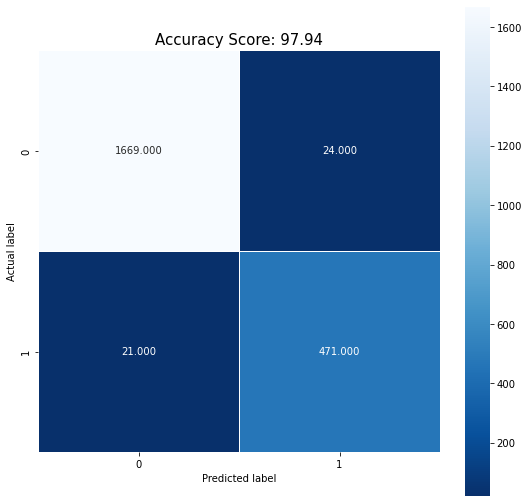

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(value)
plt.title(all_sample_title, size = 15);